<a href="https://colab.research.google.com/github/2alstj/AI-Pythoch/blob/main/MultiLayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

Target:  0
Number of data: 1797


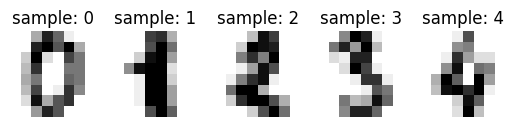

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

# 1st sample print
print(digits.images[0])

#1st sample target
print('\nTarget: ', digits.target[0])

# # of sample datas
print('Number of data: {}'.format(len(digits.images)))

# 5 samples viualization
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' %label)

Epoch    0/100 Cost: 2.499899
Epoch   10/100 Cost: 2.011244
Epoch   20/100 Cost: 1.718011
Epoch   30/100 Cost: 1.422025
Epoch   40/100 Cost: 1.112718
Epoch   50/100 Cost: 0.830773
Epoch   60/100 Cost: 0.604121
Epoch   70/100 Cost: 0.441749
Epoch   80/100 Cost: 0.337511
Epoch   90/100 Cost: 0.270486
Epoch  100/100 Cost: 0.225077
 


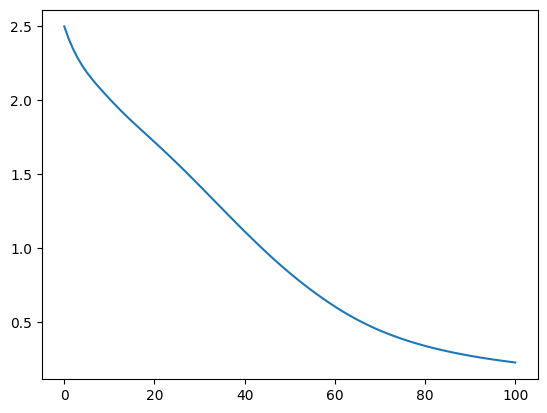

In [3]:
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

# X and Y defination
X = digits.data
Y = digits.target

#model defination
model = nn.Sequential(  #보통 점진적으로 절반씩 줄여나가는 것이 일반적
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

# X and Y (Change to Tensor)
X = torch.tensor(X, dtype = torch.float32)
Y = torch.tensor(Y, dtype = torch.int64)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

losses = []

epochs = 100

for epoch in range(epochs + 1):
  predicted = model(X)
  cost = loss_fn(predicted, Y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  losses.append(cost.item())

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, epochs, cost.item()
    ))

print(' ')
plt.plot(losses)